In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
path = "Park Unit Scraping Information.csv"
regionlookup = pd.read_csv(path, encoding='latin-1')
regionlookup.head()

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
0,Alagnak,Alagnak Wild River,Wild River,AK,AKR,ALAG,1
1,Aniakchak,Aniakchak National Monument and Preserve,National Monument & Preserve,AK,AKR,ANIA,2
2,Bering Land Bridge,Bering Land Bridge National Preserve,National Preserve,AK,AKR,BELA,1
3,Cape Krusenstern,Cape Krusenstern National Monument,National Monument,AK,AKR,CAKR,1
4,Denali,Denali National Park and Preserve,National Park & Preserve,AK,AKR,DENA,2


In [3]:
regionlookup[regionlookup['Alpha'] == 'DEVA']

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
429,Death Valley,Death Valley National Park,National Park,"CA, NV",PWR,DEVA,1


In [4]:
regionlookup.columns

Index(['Park Name', 'Park Full Name', 'Type of Unit', 'State', 'Reg', 'Alpha',
       'Unit'],
      dtype='object')

In [5]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/roadevents?api_key=3AidKP0PiqgfP8sbwZC0RZ9JM6QDnvYaZx3RRjrH')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [6]:
df

{'road_event_feed_info': {'publisher': 'National Park Service',
  'version': '4.1',
  'update_date': '2024-01-16T16:49:30.901071Z',
  'update_frequency': 900,
  'contact_name': 'National Park Service',
  'contact_email': 'asknps@nps.gov',
  'data_sources': [{'data_source_id': '02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2',
    'organization_name': 'Crater Lake National Park',
    'update_date': '2024-02-01T01:07:37.430224Z',
    'contact_name': 'Crater Lake National Park',
    'contact_email': 'CRLA_Superintendent@nps.gov'},
   {'data_source_id': '0c9a542c-a992-42be-2ddc-08d4c7ad36e2',
    'organization_name': 'Shenandoah National Park',
    'update_date': '2023-11-30T18:59:29.909161Z',
    'contact_name': 'Shenandoah National Park',
    'contact_email': 'SHEN_Superintendent@nps.gov'},
   {'data_source_id': '16b85a09-3e09-4a62-2c08-08d4c7ad36e2',
    'organization_name': 'Blue Ridge Parkway',
    'update_date': '2024-05-21T17:35:21.355588Z',
    'contact_name': 'Blue Ridge Parkway',
    'conta

In [7]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [8]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [9]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

(14, 61, 14)

In [10]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []
id_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    print("Alert ID: ", x['properties']['core_details']['data_source_id'])
  #  print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
    id_list.append(x['properties']['core_details']['data_source_id'])
   # end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Crater Lake National Park
Alert name:  Seasonal Road Closure
Description:  North Entrance Road, West Rim Drive from Discovery Point to North Junction, and East Rim Drive are currently CLOSED.  Plows are working to clear large quantities of snow. Sections of road will open gradually in June and July.
Event type:  incident
Road name:  ['North Entrance Road', 'East Rim Drive', 'Pinnacles Road', 'Grayback Road', 'West Rim Drive']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2

Park: Crater Lake National Park
Alert name:  Seasonal Road Closure
Description:  North Entrance Road, West Rim Drive from Discovery Point to North Junction, and East Rim Drive are currently CLOSED.  Plows are working to clear large quantities of snow. Sections of road will open gradually in June and July.
Event type:  incident
Road name:  ['North Entrance Road', 'East Rim Drive', 'Pinnacles Road', 'Grayback Road', 'West Rim Drive']
Vehicle impact:  all-lanes-closed
Alert ID:  

In [11]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
    "alert_id": id_list
#    "event end date": end_date_list
})
df_update.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id
0,2024-07-03,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive from Disco...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
1,2024-07-03,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive from Disco...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
2,2024-07-03,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive from Disco...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
3,2024-07-03,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive from Disco...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
4,2024-07-03,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive from Disco...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2


In [12]:
regionlookup.rename(columns={'Park Full Name':"park", "Reg":"region","Alpha":"alpha"}, inplace = True)
region_subset = regionlookup[['park', 'region', 'alpha', "State"]]
region_subset.head()

,park,region,alpha,State
0,Alagnak Wild River,AKR,ALAG,AK
1,Aniakchak National Monument and Preserve,AKR,ANIA,AK
2,Bering Land Bridge National Preserve,AKR,BELA,AK
3,Cape Krusenstern National Monument,AKR,CAKR,AK
4,Denali National Park and Preserve,AKR,DENA,AK


In [13]:
merged_df = pd.merge(df_update, region_subset, on="park", how="inner")
merged_df.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id,region,alpha,State
0,2024-07-03,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive from Disco...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
1,2024-07-03,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive from Disco...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
2,2024-07-03,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive from Disco...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
3,2024-07-03,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive from Disco...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
4,2024-07-03,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive from Disco...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR


In [14]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [15]:
df_update = pd.concat([merged_df, df_old_update])
df_update['date'] = pd.to_datetime(df_update.date)


In [16]:
null_region_count = merged_df['region'].isnull().sum()
null_region_count

0

In [17]:
if null_region_count == 0:
    df_update.to_csv("./TDx_tracker.csv", index=False)
else:
    null_region_rows = joined[joined['region'].isnull()]
    print("Rows with a null Region column:")
    print(null_region_rows)

In [18]:
path = "Park Unit Scraping Information.csv"
parks = pd.read_csv(path, encoding='latin-1')
parks.head()

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
0,Alagnak,Alagnak Wild River,Wild River,AK,AKR,ALAG,1
1,Aniakchak,Aniakchak National Monument and Preserve,National Monument & Preserve,AK,AKR,ANIA,2
2,Bering Land Bridge,Bering Land Bridge National Preserve,National Preserve,AK,AKR,BELA,1
3,Cape Krusenstern,Cape Krusenstern National Monument,National Monument,AK,AKR,CAKR,1
4,Denali,Denali National Park and Preserve,National Park & Preserve,AK,AKR,DENA,2


In [19]:
df_update.park.value_counts()

park
Crater Lake National Park                     326
Great Smoky Mountains National Park           182
Blue Ridge Parkway                            172
Mojave National Preserve                      167
Yosemite National Park                        144
Shenandoah National Park                      122
Death Valley National Park                     78
Curecanti National Recreation Area             64
Sleeping Bear Dunes National Lakeshore         59
Organ Pipe Cactus National Monument            56
Guadalupe Mountains National Park              56
Buffalo National River                         54
Ozark National Scenic Riverways                52
Black Canyon of the Gunnison National Park     52
Capitol Reef National Park                     48
Zion National Park                             44
Redwood National Park                          29
Dinosaur National Monument                     20
De Soto National Memorial                      18
Bryce Canyon National Park                   

In [20]:
len(df_update.park.unique())

31

In [21]:
running_park_list = []
date_list = []
park_count_list = []

df_update = df_update.sort_values(by=['date'])

for x in df_update.date.unique():
    df_date = df_update.loc[df_update['date']==x]
    print(x, ": ", len(df_date))
    for y in df_date['park']:
        if y not in running_park_list:
            print(y)
            running_park_list.append(y)
    date_list.append(x)
    park_count_list.append(len(running_park_list))

2023-10-17 00:00:00 :  11
Yosemite National Park
Mojave National Preserve
Acadia National Park
Dinosaur National Monument
Natchez Trace Parkway
Olympic National Park
Golden Gate National Recreation Area
2023-10-23 00:00:00 :  11
2023-11-27 00:00:00 :  4
Padre Island National Seashore
2023-12-18 00:00:00 :  4
Muir Woods National Monument
Fort Point National Historic Site
2023-12-28 00:00:00 :  3
2024-01-04 00:00:00 :  3
2024-01-11 00:00:00 :  5
Shenandoah National Park
2024-01-18 00:00:00 :  4
2024-01-25 00:00:00 :  3
2024-02-01 00:00:00 :  8
2024-02-05 00:00:00 :  61
Organ Pipe Cactus National Monument
Death Valley National Park
Bryce Canyon National Park
Valley Forge National Historical Park
Guadalupe Mountains National Park
Zion National Park
Redwood National Park
Point Reyes National Seashore
Crater Lake National Park
2024-03-04 00:00:00 :  83
Buffalo National River
Great Smoky Mountains National Park
Piscataway Park
2024-04-02 00:00:00 :  62
Ozark National Scenic Riverways
Black Ca

In [22]:
df_count = pd.DataFrame({
    'date': date_list,
    "count of parks": park_count_list
})
df_count['date'] = pd.to_datetime(df_count['date'])


[]

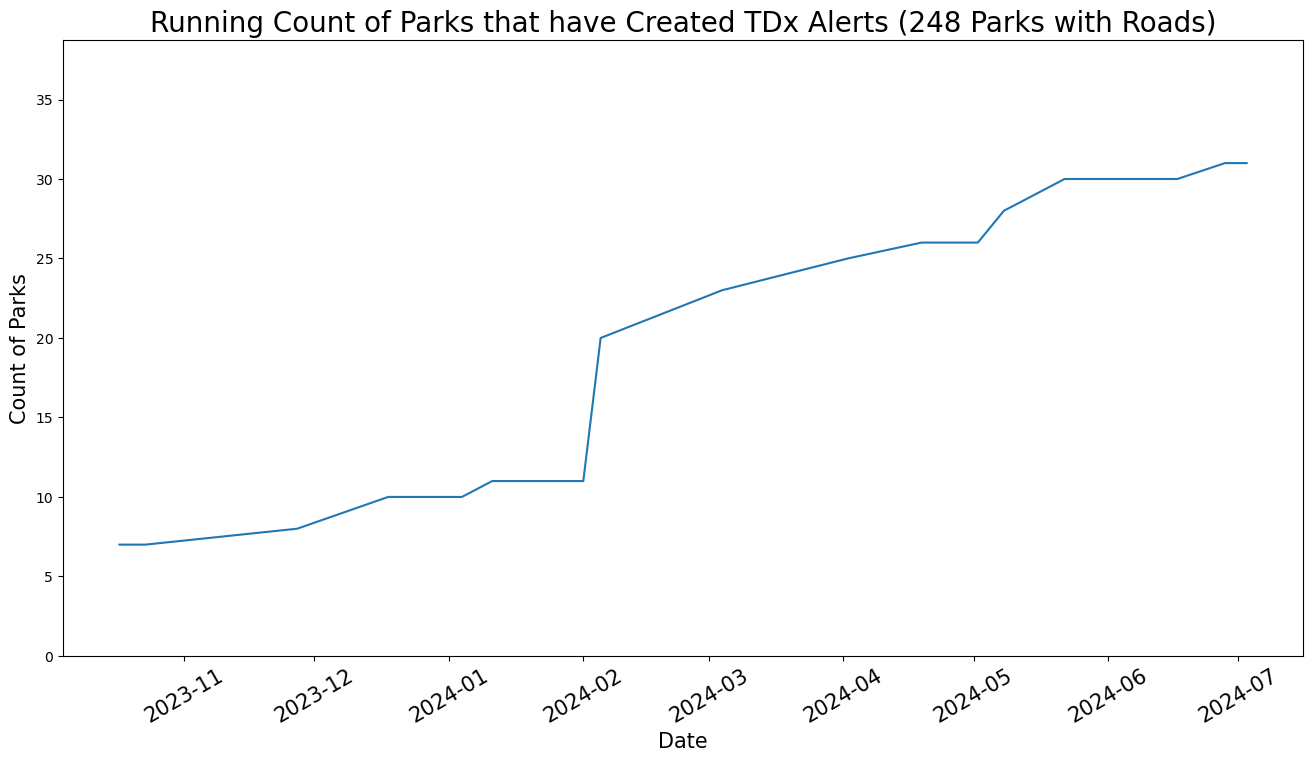

In [23]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 8))

# Creating a plot
plt.plot(df_count.date, df_count['count of parks'])

# Adding a plot title and customizing its font size
plt.title('Running Count of Parks that have Created TDx Alerts (248 Parks with Roads)', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Count of Parks', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=15)
plt.ylim([0,max(df_count['count of parks'])*1.25])

# Changing the plot resolution - zooming in the period from 15.12.2022 till 15.01.2023
#plt.xlim(pd.Timestamp('2023-09-1'), pd.Timestamp('2024-02-15'))
plt.plot()


In [24]:
df_count

,date,count of parks
0,2023-10-17,7
1,2023-10-23,7
2,2023-11-27,8
3,2023-12-18,10
4,2023-12-28,10
5,2024-01-04,10
6,2024-01-11,11
7,2024-01-18,11
8,2024-01-25,11
9,2024-02-01,11


## Alerts

In [26]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/alerts?limit=1000&api_key=3AidKP0PiqgfP8sbwZC0RZ9JM6QDnvYaZx3RRjrH')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [27]:
id_list = []
url_list = []
title_list = []
parkCode_list = []
description_list = []
category_list = []
relatedRoadEvents_list = []
lastIndexedDate_list = []

for x in df['data']:
    #print(x)
    id_list.append(x['id'])
    url_list.append(x['url']) 
    title_list.append(x['title']) 
    parkCode_list.append(x['parkCode'].upper()) 
    description_list.append(x['description'])
    category_list.append(x['category']) 
    relatedRoadEvents_list.append(x['relatedRoadEvents'])
    lastIndexedDate_list.append(x['lastIndexedDate'])


In [28]:
alerts_df = pd.DataFrame({
    'id': id_list, 
    'url': url_list, 
    'title': title_list,
    'park alpha': parkCode_list,
    'description': description_list,
    'category': category_list,
    'relatedRoadEvents':relatedRoadEvents_list,
    'LastIndexedDate':lastIndexedDate_list
})

In [29]:
alerts_df2 = alerts_df.merge(parks,left_on='park alpha', right_on="Alpha", how = "left")

In [30]:
road_closed_flag_list = []
road_words_list = ["road", "route", "interstate", "highway", "vehic"]

for x in range(len(alerts_df2)): 
    road_closed_flag = "No"
    
    for y in road_words_list:
        if y in str(alerts_df2["description"][x].lower()):
            road_closed_flag = "Yes"
            break
            
    road_closed_flag_list.append(road_closed_flag)

alerts_df2["Road Closed Flag"] = road_closed_flag_list

In [31]:
# add to alerts tracker table
alerts_df2['date'] = today_string
alerts_df2_old = pd.read_csv("./alerts_api_tracker.csv")
alerts_df2_combined = pd.concat([alerts_df2, alerts_df2_old])
alerts_df2_combined.to_csv("alerts_api_tracker.csv", index=False)

##### Create a tracking table

NPS wants to know how many total road closures there are, and how many of these are included in the TDx feed. For this, we can subset our alerts table for road closure alerts then compare our 2 tables. 

In [33]:
# filter our alerts table to only include road closures
alerts_df3 = alerts_df2.loc[alerts_df2['Road Closed Flag']=="Yes"]

# group by our park-related fields and create sub-lists for our alert info
alerts_df3_grouped = alerts_df3.groupby(['park alpha','Park Name', 'Park Full Name',
       'Type of Unit', 'State','Reg'])[['title', 'description', 'category',
       'relatedRoadEvents']].agg(lambda x: list(x)).reset_index()

In [34]:
# create list of the unique park alphas in our two tables
has_alerts = set(alerts_df3['park alpha'])
has_tdx = set(merged_df['alpha'])

# create sublists of overlapping alphas, only in alerts table, only in TDx table
has_both = has_alerts.intersection(has_tdx)
only_alerts = has_alerts - has_tdx
only_tdx = has_tdx - has_alerts

#create empty data frame then populate the rows
status = pd.DataFrame(columns=['Park Alpha', 'Status'])
status['Park Alpha'] = list(has_both) + list(only_alerts) + list(only_tdx)
status['Status'] = (['Using TDx feed and alerts'] * len(has_both)) + (['Only using alerts'] * len(only_alerts)) + (['Only using TDx feed'] * len(only_tdx))

In [35]:
# join our status table with our alerts table
status_merged = status.merge(alerts_df3_grouped,left_on='Park Alpha', right_on="park alpha", how = "left")

In [36]:
status_merged['Status'].value_counts()

Status
Only using alerts            101
Using TDx feed and alerts     12
Only using TDx feed            2
Name: count, dtype: int64

In [37]:
status_merged.to_csv("combined_status.csv", index=False)

#### Create a tracker spreadsheet with the combined updates

In [39]:
df_update_combined = status_merged
df_update_combined['date'] = today_string

In [40]:
df_old_update = pd.read_csv("./combined_status_tracker.csv")

In [41]:
df_update_combined = pd.concat([df_update_combined, df_old_update])

In [42]:
df_update_combined.to_csv("combined_status_tracker.csv", index=False)